<a href="https://colab.research.google.com/github/CakeNuthep/Super_AI/blob/master/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis**


---
ข้อมูลที่ใช้เป็นข้อมูลการขายของประเทศไทย โดยใช้ Platform ที่ชื่อว่า Facebook 

Data: https://www.kaggle.com/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo?select=Live.csv


**คำถาม**
- แนมโน้มการขายของบน Facebook
- แนวโน้มการใช้วีดีโอ
- แนวโน้มการใข้รูปภาพ
- สิ่งที่มีผลต่อ การ แชร์
- สิ่งที่มีผลต่อ การ comment

**ตั้งสมมติฐาน**
- การกดรูปหัวใจมีผลสำคัญมากต่อการ Comment และ การแชร์

**ตั้งเป้าหมาย**
- เพื่อให้คนขายทราบถึงสิ่งที่จะช่วยเพิ่มโอกาสในการขายของได้มากขึ้น




In [123]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [95]:
df = pd.read_csv('Live.csv')

# **Preview Data**

In [85]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [86]:
df.head

<bound method NDFrame.head of                               status_id status_type  ... Column3  Column4
0      246675545449582_1649696485147474       video  ...     NaN      NaN
1      246675545449582_1649426988507757       photo  ...     NaN      NaN
2      246675545449582_1648730588577397       video  ...     NaN      NaN
3      246675545449582_1648576705259452       photo  ...     NaN      NaN
4      246675545449582_1645700502213739       photo  ...     NaN      NaN
...                                 ...         ...  ...     ...      ...
7045  1050855161656896_1061863470556065       photo  ...     NaN      NaN
7046  1050855161656896_1061334757275603       photo  ...     NaN      NaN
7047  1050855161656896_1060126464063099       photo  ...     NaN      NaN
7048  1050855161656896_1058663487542730       photo  ...     NaN      NaN
7049  1050855161656896_1050858841656528       photo  ...     NaN      NaN

[7050 rows x 16 columns]>

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [88]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

# **Clean Data**

In [96]:
# drop colum Column1,Column2,Column3,Column4
df = df.drop(['Column1','Column2','Column3','Column4'],
  axis=1)

In [97]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [98]:
len(df.status_id.unique()) # status_id not uniq

6997

In [12]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [13]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [20]:
#สันนิษฐานว่า จำนวน reactions ต้องเท่ากับ ผลบวกของ num_likes, num_loves,num_wows,num_hahas,num_sads,num_angrys
sum_colum = df.num_likes + df.num_loves+df.num_wows+df.num_hahas+df.num_sads+df.num_angrys
(sum_colum == df.num_reactions).count() # แสดงว่าสันนิษฐาน ถูกต้อง

7050

In [28]:
df.status_published.min()

'1/1/2018 1:39'

In [29]:
df.status_published.max() #ต้องจัดรูปแบบ DateTime ใหม่

'9/9/2017 7:13'

In [101]:
df.status_published = pd.to_datetime(df.status_published, dayfirst=True)

In [102]:
df.status_published

0      2018-04-22 06:00:00
1      2018-04-21 22:45:00
2      2018-04-21 06:17:00
3      2018-04-21 02:29:00
4      2018-04-18 03:22:00
               ...        
7045   2016-09-24 02:58:00
7046   2016-09-23 11:19:00
7047   2016-09-21 23:03:00
7048   2016-09-20 00:43:00
7049   2016-10-09 10:30:00
Name: status_published, Length: 7050, dtype: datetime64[ns]

In [103]:
df.status_published.min()

Timestamp('2012-01-08 07:38:00')

In [104]:
df.status_published.max()

Timestamp('2018-12-06 23:15:00')

# **Analyse Data**

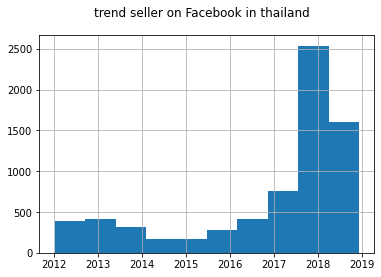

In [105]:
df['status_published'].hist()
plt.suptitle("trend seller on Facebook in thailand")
plt.show() #แสดงว่าหลังปี 2018 มีความเป็นไปได้ที่จะมีคนขายบน Facebook มากขึ้น

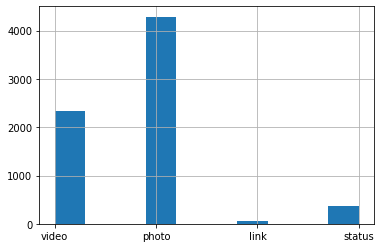

In [106]:
df['status_type'].hist()
plt.show() #มีการขายด้วยรูปมากกว่าอย่างอื่น รองลมาคือ video, status และ link ตามลำดับ

In [107]:
video_data = (df['status_type'] == 'video')
df[video_data]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
6,246675545449582_1645564175560705,video,2018-04-18 00:24:00,503,614,72,418,70,10,2,0,3
7,246675545449582_1644824665634656,video,2018-04-17 07:42:00,295,453,53,260,32,1,1,0,1
15,246675545449582_1628507150599741,video,2018-01-04 05:16:00,332,100,30,303,23,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6974,1050855161656896_1341548359254240,video,2017-07-17 08:01:00,300,5404,219,245,44,1,7,2,1
6977,1050855161656896_1339706342771775,video,2017-07-15 10:52:00,253,4432,167,209,29,5,5,5,0
6978,1050855161656896_1339390826136660,video,2017-07-15 04:42:00,324,4472,232,278,33,5,5,3,0
6992,1050855161656896_1215941701814907,video,2017-03-03 09:39:00,36,240,20,33,2,1,0,0,0


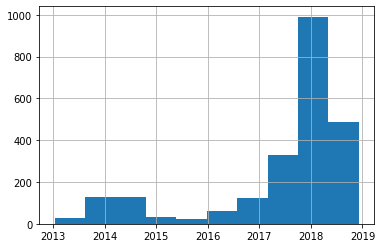

In [108]:
df_video = df[video_data]
df_video['status_published'].hist()
plt.show() #ทุกปีรวมกัน การขายผ่าน Facebook ด้วยวีดีโอ

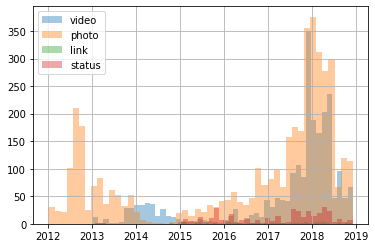

In [109]:
status_type = df['status_type'].unique()
for t in status_type:
  type_data = (df['status_type'] == t)
  df_type = df[type_data]
  df_type['status_published'].hist(alpha=0.4, bins=50)

plt.legend(status_type)
plt.show() #จากข้อมูลพบว่า รูปภาพยังใช้มากที่สุด และแนวโน้มของทุกตัวมีแนวโน้มใช้มากขึ้น

In [110]:
df_corr = df.drop(['status_id','status_published', 'num_reactions'], axis=1)
df_corr

,status_type,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,512,262,432,92,3,1,1,0
1,photo,0,0,150,0,0,0,0,0
2,video,236,57,204,21,1,1,0,0
3,photo,0,0,111,0,0,0,0,0
4,photo,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,photo,0,0,89,0,0,0,0,0
7046,photo,0,0,14,1,0,1,0,0
7047,photo,0,0,1,1,0,0,0,0
7048,photo,12,22,349,2,0,0,0,0


## **One Hot Encoder**

In [111]:
df_one_hot = pd.get_dummies(df_corr.status_type, prefix='type')
df_one_hot

,type_link,type_photo,type_status,type_video
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
7045,0,1,0,0
7046,0,1,0,0
7047,0,1,0,0
7048,0,1,0,0


In [112]:
df_corr = pd.concat([df_corr,df_one_hot], axis=1)

In [113]:
df_corr

,status_type,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video
0,video,512,262,432,92,3,1,1,0,0,0,0,1
1,photo,0,0,150,0,0,0,0,0,0,1,0,0
2,video,236,57,204,21,1,1,0,0,0,0,0,1
3,photo,0,0,111,0,0,0,0,0,0,1,0,0
4,photo,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,0,0,89,0,0,0,0,0,0,1,0,0
7046,photo,0,0,14,1,0,1,0,0,0,1,0,0
7047,photo,0,0,1,1,0,0,0,0,0,1,0,0
7048,photo,12,22,349,2,0,0,0,0,0,1,0,0


In [115]:
# drop status_type column
df_corr = df_corr.drop(['status_type'],axis=1)
df_corr

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video
0,512,262,432,92,3,1,1,0,0,0,0,1
1,0,0,150,0,0,0,0,0,0,1,0,0
2,236,57,204,21,1,1,0,0,0,0,0,1
3,0,0,111,0,0,0,0,0,0,1,0,0
4,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0,0,89,0,0,0,0,0,0,1,0,0
7046,0,0,14,1,0,1,0,0,0,1,0,0
7047,0,0,1,1,0,0,0,0,0,1,0,0
7048,12,22,349,2,0,0,0,0,0,1,0,0


## **Normalize Data**

In [120]:
x = df_corr.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_corr_normalize = pd.DataFrame(x_scaled,columns=df_corr.columns)

In [121]:
df_corr_normalize

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video
0,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
7046,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0
7047,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
7048,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


## **Show Correlation HeatMap**

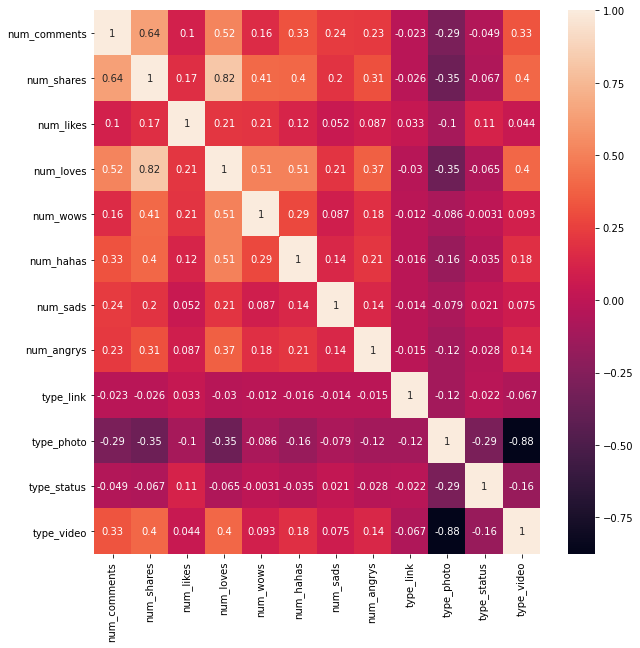

In [131]:
corrMatrix = df_corr_normalize.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True)

plt.show()

จากการวาด Correlation Heatmap พบว่า 

- รูป reaction ที่ส่งผลเพื่อให้คนมา คอมเมนกับ แชร์มากนั้น นั่นก็คือ reaction รูปหัวใจ
- โพสน์ใหนที่มีการกดรูป reaction ถูกใจมากจะมีโอกาสที่จะทำให้มีการคอมเมนและแชร์น้อย
- การโพสน์ขายของ Video บนเฟสจะมีโอกาสที่คน comment และแชร์มากกว่า รูปภาพ, status, link

# **สรุปผล**

- การขายของบน Facebook มีอัตราที่มากขึ้นทุกปี
- คนส่วนมากจะขายโดยการโพสน์รูปมากกว่า Video แต่การโพสน์ Video จะทำให้ได้การแชร์และ comment ที่มากกว่ารูป ดังนั้นหากจะขายของให้ผู้คนสนใจควรเลือกเป็นวีดีโอ
- ในการวัดผลสิ่งที่โพสน์ว่าเป็นโพสน์ที่ดีอาจจะไม่สามารถดูจำนวนการถูกใจได้ แต่ควรดู reaction อื่นแทน เช่นรูปหัวใจ, รูปหัวเราะ เป็นต้น